**Cardiovascular Disease 10-Year Risk Prediction**

**Machine Learning -4 Classification Algorithms**

Github Repo: [click_here](https://github.com/akampa-776/ML-Classification-Model-Algorithms)

Group 1 Members:
1. AKAMPA GODFREY
2. NAZZIWA RHODA
3. NAMEERU BRONAH


This section focuses on building and evaluating classification models to predict the likelihood of a 10-year cardiovascular event (heart attack or stroke) using demographic, clinical, and lifestyle features from the CVD dataset. The goal is to apply machine learning techniques including, but not limited to:

1. Logistic Regression

2. Random Forest

3. K-Nearest Neighbors (KNN)

The aim is to compare the performance of these algorithms, identify which model best captures the underlying risk patterns in the data, and provide a reliable predictive tool that supports early identification of individuals at elevated cardiovascular risk.

**Import necessary Libraries**

In [3]:
## Import libraries
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# handling imbalanced data
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
# set style
pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)

**Load the data**

In [4]:
# load the dataset
file_path = 'cvd_dataset.csv'
df = pd.read_csv(file_path)
df = df.set_index('patient_id')
df.head()

,gender,age,body_mass_index,smoker,systolic_blood_pressure,hypertension_treated,family_history_of_cardiovascular_disease,atrial_fibrillation,chronic_kidney_disease,rheumatoid_arthritis,diabetes,chronic_obstructive_pulmonary_disorder,forced_expiratory_volume_1,time_to_event_or_censoring,heart_attack_or_stroke_occurred
patient_id,,,,,,,,,,,,,,,
PT00085957,F,54,25.0,0,161.0,0,1,0,0,0,0,0,NaN,10,0
PT00093111,M,31,NaN,0,121.0,0,0,0,0,0,0,0,NaN,10,0
PT00058456,M,50,31.3,0,130.0,0,0,0,0,0,0,0,91.027306,10,0
PT00016352,M,61,30.0,0,165.0,0,0,0,0,0,0,0,NaN,6,1
PT00060611,F,67,32.6,0,166.0,0,0,0,0,0,0,0,NaN,10,0


**High-Level Inspection**

In [5]:
# data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, PT00085957 to PT00069145
Data columns (total 15 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   gender                                    100000 non-null  object 
 1   age                                       100000 non-null  int64  
 2   body_mass_index                           70115 non-null   float64
 3   smoker                                    100000 non-null  int64  
 4   systolic_blood_pressure                   90133 non-null   float64
 5   hypertension_treated                      100000 non-null  int64  
 6   family_history_of_cardiovascular_disease  100000 non-null  int64  
 7   atrial_fibrillation                       100000 non-null  int64  
 8   chronic_kidney_disease                    100000 non-null  int64  
 9   rheumatoid_arthritis                      100000 non-null  int64  
 10  diabetes    

In [6]:
# shape of the dataset
df.shape

(100000, 15)

**Data type Cleaning**

In [7]:
# Essentially a bunch of binary columns are converted in yes/no format.
binary_columns = [
    'smoker','hypertension_treated','family_history_of_cardiovascular_disease',
    'atrial_fibrillation','chronic_kidney_disease','rheumatoid_arthritis',
    'diabetes','chronic_obstructive_pulmonary_disorder','heart_attack_or_stroke_occurred'
]

df[binary_columns] = df[binary_columns].replace({1:'Yes', 0:'No'})

In [8]:
# convert target variable from numeric to categorical
# df['gender'] = df['gender'].replace(['M','F'], [1, 0])
df['age'] = df['age'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, PT00085957 to PT00069145
Data columns (total 15 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   gender                                    100000 non-null  object 
 1   age                                       100000 non-null  float64
 2   body_mass_index                           70115 non-null   float64
 3   smoker                                    100000 non-null  object 
 4   systolic_blood_pressure                   90133 non-null   float64
 5   hypertension_treated                      100000 non-null  object 
 6   family_history_of_cardiovascular_disease  100000 non-null  object 
 7   atrial_fibrillation                       100000 non-null  object 
 8   chronic_kidney_disease                    100000 non-null  object 
 9   rheumatoid_arthritis                      100000 non-null  object 
 10  diabetes    

In [10]:
## check for duplicates Value
print(f'Duplicates represent: {df.duplicated().sum()/len(df)*100}% proportions in rows of the dataset.')

Duplicates represent: 7.084% proportions in rows of the dataset.


In [11]:
# drop duplicates
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

**Report on the missing Values**

In [12]:
# check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

body_mass_index               23289
systolic_blood_pressure        8444
forced_expiratory_volume_1    62241
dtype: int64

This will be handled in Feature transformation on the Train Dataset inorder to avoid data leakages(i.e Target leakage and Train-test contamination)

**Target Variable Analysis-Class balance reporting**

In [13]:
# Target Variable Analysis
print('Target Variable Distribution:')
print(f'Value Count: {df['heart_attack_or_stroke_occurred'].value_counts()}')
print('---------------------------------')
print(f'Proportion: {df['heart_attack_or_stroke_occurred'].value_counts(normalize=True)}')

Target Variable Distribution:
Value Count: heart_attack_or_stroke_occurred
No     86308
Yes     6608
Name: count, dtype: int64
---------------------------------
Proportion: heart_attack_or_stroke_occurred
No     0.928882
Yes    0.071118
Name: proportion, dtype: float64


The analysis reveals a high class imbalance between the events thus informing the future perfect scenarios for proper evaluation metric selection.

This implies that accuracy might not be the ideal best metric for evaluation thus we will substitute it with [other assessment measures](https://www.geeksforgeeks.org/machine-learning/handling-imbalanced-data-for-classification/) on like precision, recall, likelihood  binary-cross-entrophy and F1-score for model evaluation.

How shall will overcome?
Techniques included;
- Resampling (oversampling or undersampling),
- Specialized algorithms and;
- Alternative evaluation metrics.

**Feature Selection**

In [14]:
# Creating/Separate X-Features and Target-Vector y
y = df['heart_attack_or_stroke_occurred']
X = df.drop(columns='heart_attack_or_stroke_occurred')

**Feature Engineering**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92916 entries, PT00085957 to PT00069145
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   gender                                    92916 non-null  object 
 1   age                                       92916 non-null  float64
 2   body_mass_index                           69627 non-null  float64
 3   smoker                                    92916 non-null  object 
 4   systolic_blood_pressure                   84472 non-null  float64
 5   hypertension_treated                      92916 non-null  object 
 6   family_history_of_cardiovascular_disease  92916 non-null  object 
 7   atrial_fibrillation                       92916 non-null  object 
 8   chronic_kidney_disease                    92916 non-null  object 
 9   rheumatoid_arthritis                      92916 non-null  object 
 10  diabetes                 

In [16]:
nominal_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['float64','int64']).columns
print(f'nominal_cols:{nominal_cols}\nnum_cols:{num_cols}')

nominal_cols:Index(['gender', 'smoker', 'hypertension_treated',
       'family_history_of_cardiovascular_disease', 'atrial_fibrillation',
       'chronic_kidney_disease', 'rheumatoid_arthritis', 'diabetes',
       'chronic_obstructive_pulmonary_disorder'],
      dtype='object')
num_cols:Index(['age', 'body_mass_index', 'systolic_blood_pressure',
       'forced_expiratory_volume_1', 'time_to_event_or_censoring'],
      dtype='object')


In [17]:
# convert correctly nominal columns of X to categorical dtype of 0's and 1's for easy computations
for col in nominal_cols:
    if set(X[col].unique()) == {'Yes', 'No'}:
        X[col] = X[col].replace({'Yes':1, 'No':0}).astype('int64')
    if set(X[col].unique()) == {'M', 'F'}:
        X[col] = X[col].replace({'M':1, 'F':0}).astype('int64')

In [18]:
# convert target variable y to numeric 0's and 1's
y = y.replace({'Yes':1, 'No':0}).astype('int64')
y.value_counts()

heart_attack_or_stroke_occurred
0    86308
1     6608
Name: count, dtype: int64

In [19]:
nominal_cols

Index(['gender', 'smoker', 'hypertension_treated',
       'family_history_of_cardiovascular_disease', 'atrial_fibrillation',
       'chronic_kidney_disease', 'rheumatoid_arthritis', 'diabetes',
       'chronic_obstructive_pulmonary_disorder'],
      dtype='object')

In [20]:
num_cols

Index(['age', 'body_mass_index', 'systolic_blood_pressure',
       'forced_expiratory_volume_1', 'time_to_event_or_censoring'],
      dtype='object')

In [21]:
nominal_cols = nominal_cols.drop(['smoker', 'rheumatoid_arthritis', 'chronic_obstructive_pulmonary_disorder'])
num_cols = num_cols.drop(['time_to_event_or_censoring', 'forced_expiratory_volume_1'])

In [22]:
X.head()

,gender,age,body_mass_index,smoker,systolic_blood_pressure,hypertension_treated,family_history_of_cardiovascular_disease,atrial_fibrillation,chronic_kidney_disease,rheumatoid_arthritis,diabetes,chronic_obstructive_pulmonary_disorder,forced_expiratory_volume_1,time_to_event_or_censoring
patient_id,,,,,,,,,,,,,,
PT00085957,0,54.0,25.0,0,161.0,0,1,0,0,0,0,0,NaN,10
PT00093111,1,31.0,NaN,0,121.0,0,0,0,0,0,0,0,NaN,10
PT00058456,1,50.0,31.3,0,130.0,0,0,0,0,0,0,0,91.027306,10
PT00016352,1,61.0,30.0,0,165.0,0,0,0,0,0,0,0,NaN,6
PT00060611,0,67.0,32.6,0,166.0,0,0,0,0,0,0,0,NaN,10


**Feature Dropping and Justification**

In [23]:
# drop the irrelevant columns
# nominal_cols = nominal_cols.drop('smoker') # EDA reveals no significant relationship btn smoker variable and the occurence of the event
# num_cols = num_cols.drop('time_to_event_or_censoring') #redundant variable

**train_test_split reporting**

In [24]:
X=X.drop(columns=['smoker', 'rheumatoid_arthritis', 'forced_expiratory_volume_1', 'chronic_obstructive_pulmonary_disorder', 'time_to_event_or_censoring' ])

In [25]:
#train_test_split-Model Validation(Before Preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [26]:
X_train.head()

,gender,age,body_mass_index,systolic_blood_pressure,hypertension_treated,family_history_of_cardiovascular_disease,atrial_fibrillation,chronic_kidney_disease,diabetes
patient_id,,,,,,,,,
PT00025600,0,41.0,24.9,118.0,1,0,0,0,0
PT00005780,0,57.0,23.3,134.0,0,0,0,1,0
PT00041509,1,40.0,21.4,120.0,0,0,0,0,0
PT00084551,0,30.0,22.4,138.0,0,0,0,0,0
PT00005981,0,23.0,20.0,126.0,0,0,0,0,0


In [27]:
print(f'Training set: {len(y_train)/len(df)*100:.2f}% of full dataset')
print(f'Test set: {len(y_test)/len(df)*100:.2f}% of full dataset')

Training set: 80.00% of full dataset
Test set: 20.00% of full dataset


**Feature Transformation**

1. Create Transformers using Pipeline Package

In [28]:
# Pipeline for numeric varibles
numerical_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical-nominal variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

Note:
1. `handle_unknown='ignore'`: This parameter specifies how the encoder should handle categories in new data (e.g., test or validation data) that it did not encounter during the initial fit on the training data.
2. `sparse_output = 'False'`: This parameter determines the format of the output data structure.
- False: the encoder returns a dense NumPy array (a standard matrix where all values, including zeros, are stored).
- True: The encoder returns a sparse matrix which only stores the non-zero entries

In [29]:
# Combine both transformers using ColumnTransformer
cvd_preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, num_cols),
        ('categorical', categorical_transformer, nominal_cols)
    ], remainder='passthrough' #keep any unprocessed columns
)

**Fit our Transformers to our Training set**

**Handle class Imbalance**

To address the class imbalance present in the cardiovascular disease dataset, we will apply SMOTE (Synthetic Minority Oversampling Technique). SMOTE improves model performance by creating synthetic examples of the minority class using k-nearest neighbours, which helps the model learn decision boundaries more effectively without simply duplicating data or causing excessive overfitting.

In addition to `SMOTE`,  other explored complementary imbalance-handling strategies, including:

1. Oversampling techniques oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)

- Up-sampling the minority class

- Down-sampling the majority class

2. Balanced Bagging Classifier (ensemble method) bbc = BalancedBaggingClassifier(random_state=42)

- Combines bootstrapping with balanced sampling

- Helps stabilize variance and improve minority-class detection

Together, these techniques aim to create a balanced training set, reduce bias toward the majority class, and ultimately improve the model’s ability to correctly identify individuals at higher cardiovascular risk.

In [30]:
# use of SMOTE for handling class imbalance
smote = SMOTE(sampling_strategy='minority', random_state=42)

**Logistic Regression Classifier Model**

In [31]:
# Logistic Regression Classifier Model**
log_reg_clf = ImbPipeline(steps=[
    ('preprocessor', cvd_preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression())
])

**Note:** We use `ImbPipeline` (from imbalanced-learn) instead of `Pipeline` because it allows resampling methods like SMOTE to access both `X` and `y` during training.

Standard `Pipeline` only passes `X` through transformers, so SMOTE cannot generate synthetic samples properly without `ImbPipeline`.

In [32]:
log_reg_clf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [33]:
y_pred = log_reg_clf.predict(X_test)

In [34]:
y_train.value_counts()

heart_attack_or_stroke_occurred
0    69046
1     5286
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       0.98      0.72      0.83     17262
           1       0.18      0.80      0.29      1322

    accuracy                           0.72     18584
   macro avg       0.58      0.76      0.56     18584
weighted avg       0.92      0.72      0.79     18584



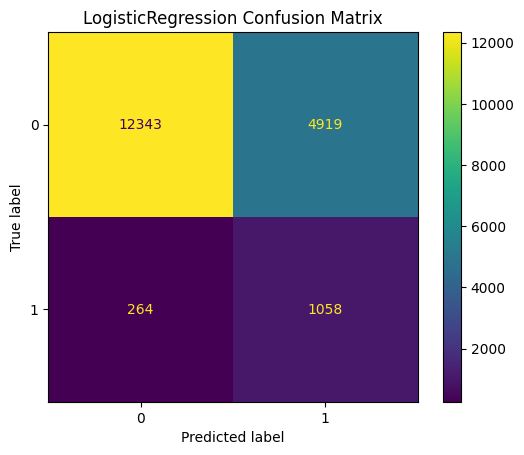

In [35]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('LogisticRegression Confusion Matrix')
plt.show()

**K-NearestNeighbors(KNN) Classifier Model**

In [36]:
# combine the preprocessor and  KNN-model
KNN_clf = ImbPipeline(steps=[
    ('preprocessor', cvd_preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

In [37]:
# Train the KNN model
KNN_clf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [38]:
y2_pred = KNN_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     17262
           1       0.15      0.50      0.23      1322

    accuracy                           0.77     18584
   macro avg       0.55      0.65      0.55     18584
weighted avg       0.90      0.77      0.82     18584



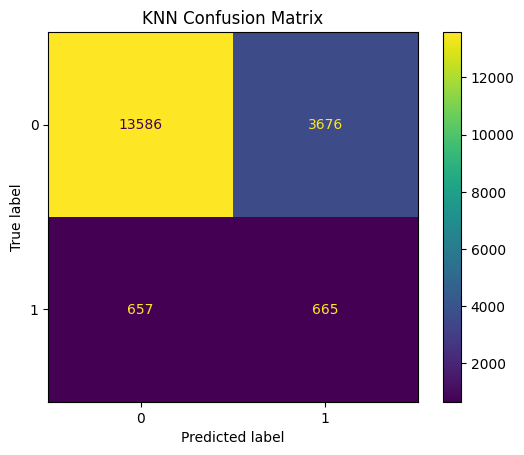

In [39]:
print(classification_report(y_test, y2_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y2_pred)
plt.title('KNN Confusion Matrix')
plt.show()

**KNN PARAMETER TUNNINNG**

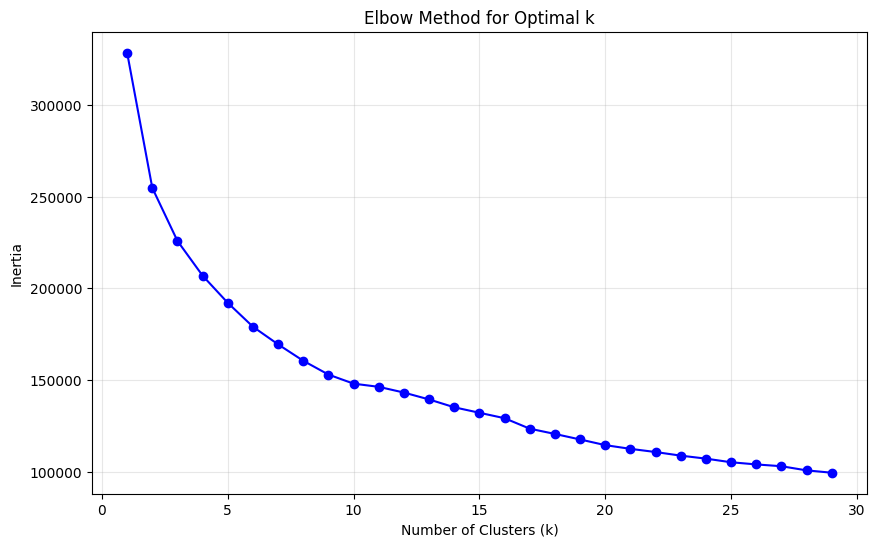

In [40]:
# Tune a KMeans Model and Cluster the Scaled Data Using All Features
# Find optimal k using the elbow method
X_train_scaled = cvd_preprocessor.fit_transform(X_train)

inertias = []
K_range = range(1, 30)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True, alpha=0.3)
plt.show()

Based on the elbow plot, we shall choose our optimal k = 15

In [41]:
# Re-combine the preprocessor and  KNN-model of optimal Clusters = 15
KNN_clf_optimal = ImbPipeline(steps=[
    ('preprocessor', cvd_preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(n_neighbors=15))
])

In [42]:
# Re-train the KNN model
KNN_clf_optimal.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y2_pred_optimal = KNN_clf_optimal.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.73      0.83     17262
           1       0.16      0.65      0.25      1322

    accuracy                           0.72     18584
   macro avg       0.56      0.69      0.54     18584
weighted avg       0.91      0.72      0.79     18584



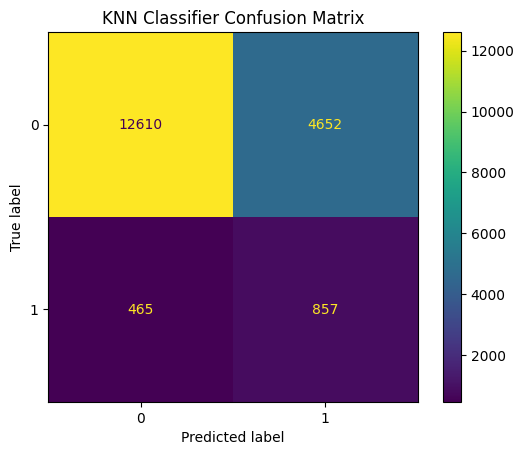

In [ ]:
print(classification_report(y_test, y2_pred_optimal))
ConfusionMatrixDisplay.from_predictions(y_test, y2_pred_optimal)
plt.title('KNN Classifier Confusion Matrix')
plt.show()

**Random Forest Classifier**

In [ ]:
# Random Forest Classifier Model**
rf_reg_clf = ImbPipeline(steps=[
    ('preprocessor', cvd_preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier())
])

In [ ]:
rf_reg_clf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# predicting
y3_pred = rf_reg_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     17262
           1       0.19      0.23      0.21      1322

    accuracy                           0.87     18584
   macro avg       0.56      0.58      0.57     18584
weighted avg       0.89      0.87      0.88     18584



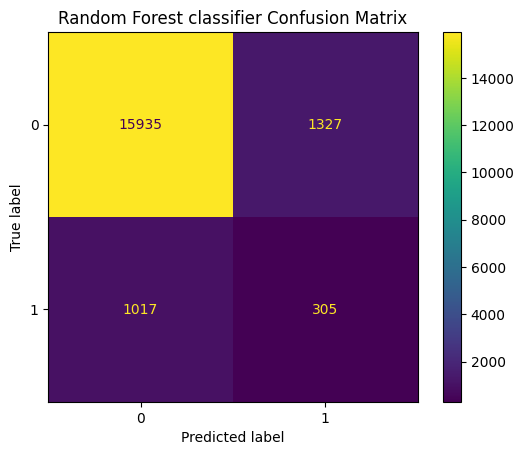

In [ ]:
print(classification_report(y_test, y3_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y3_pred)
plt.title('Random Forest classifier Confusion Matrix')
plt.show()

Optional

In [ ]:
sample = X_test.iloc[0:12]
prediction = rf_reg_clf.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Patient: {sample_dict}")
print(f"Predicted Results: {'Occurance of an Event Detected' if prediction[0] == 1 else 'No Occurence Detected'}")


Sample Patient: {'gender': 0.0, 'age': 61.0, 'body_mass_index': nan, 'systolic_blood_pressure': 128.0, 'hypertension_treated': 0.0, 'family_history_of_cardiovascular_disease': 0.0, 'atrial_fibrillation': 0.0, 'chronic_kidney_disease': 0.0, 'diabetes': 0.0}
Predicted Results: No Occurence Detected


In [ ]:
X_test_tr = cvd_preprocessor.transform(X_test)

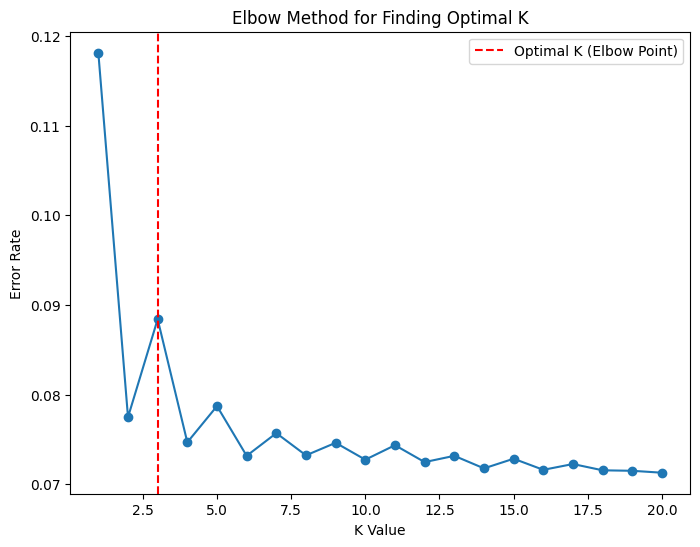

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 21)
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_predknn = knn.predict(X_test_tr)
    error_rate = 1 - accuracy_score(y_test, y_predknn)
    error_rates.append(error_rate)

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=3, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()

In [ ]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import joblib

In [ ]:
#  SAVE THE MODEL TO DISK
joblib.dump(log_reg_clf, 'cvd_risk_logistic_reg_model.pkl')
print("MODEL SAVED SUCCESSFULLY!")

NameError: name 'log_reg_clf' is not defined